In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Load the DataFrame (replace with your actual data loading step)
df = pd.read_csv('./issues_sharing_output_with_patterns_effectiveness_score.csv')
df.head()

,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,UpdatedAt,State,...,CSharing_Status,CSharing_DateOfConversation,CSharing_Title,CSharing_NumberOfPrompts,CSharing_TokensOfPrompts,CSharing_TokensOfAnswers,Conversation_Prompt,Conversation_Answer,Detected Patterns,Effectiveness_Score
0,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1371,2558,36,1.035861
1,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1370,2559,36,1.035861
2,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1400,2652,36,1.035861
3,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1459,2579,36,1.035861
4,0,167,271,141,12,31,337,114,127,1,...,200,55,344,11,2637,4712,1457,2645,36,1.035861


In [18]:
# Since the dataset is already encoded other than the Conversation_Answer column
le = LabelEncoder()
df['Conversation_Answer'] = le.fit_transform(df['Conversation_Answer'])

In [19]:
print(df.columns.tolist())

['Type', 'URL', 'Author', 'RepoName', 'RepoLanguage', 'Number', 'Title', 'Body', 'UpdatedAt', 'State', 'CSharing_URL', 'CSharing_Status', 'CSharing_DateOfConversation', 'CSharing_Title', 'CSharing_NumberOfPrompts', 'CSharing_TokensOfPrompts', 'CSharing_TokensOfAnswers', 'Conversation_Prompt', 'Conversation_Answer', 'Detected Patterns', 'Effectiveness_Score']


In [20]:
# Defining the features and target variables on the basis of correlation
X = df[['Detected Patterns', 'CSharing_TokensOfPrompts','CSharing_TokensOfAnswers','CSharing_NumberOfPrompts','Conversation_Prompt','Conversation_Answer']]
y = df['Effectiveness_Score']

In [21]:
# Scaling all the columns
scaler = StandardScaler()
X[['Detected Patterns', 'CSharing_TokensOfPrompts','CSharing_TokensOfAnswers','CSharing_NumberOfPrompts','Conversation_Prompt','Conversation_Answer']] = scaler.fit_transform(X[['Detected Patterns', 'CSharing_TokensOfPrompts','CSharing_TokensOfAnswers','CSharing_NumberOfPrompts','Conversation_Prompt','Conversation_Answer']])

C:\Temp\ipykernel_22784\2843760709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Detected Patterns', 'CSharing_TokensOfPrompts','CSharing_TokensOfAnswers','CSharing_NumberOfPrompts','Conversation_Prompt','Conversation_Answer']] = scaler.fit_transform(X[['Detected Patterns', 'CSharing_TokensOfPrompts','CSharing_TokensOfAnswers','CSharing_NumberOfPrompts','Conversation_Prompt','Conversation_Answer']])


In [22]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Model Selection (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [24]:
# Model Training
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Model Evaluation
y_pred = model.predict(X_test)

In [26]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.0011
Mean Absolute Error: 0.0040
R-squared: 0.9998


In [27]:
# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                    Feature  Importance
1  CSharing_TokensOfPrompts    0.622078
2  CSharing_TokensOfAnswers    0.359255
0         Detected Patterns    0.011794
3  CSharing_NumberOfPrompts    0.004848
4       Conversation_Prompt    0.001446
5       Conversation_Answer    0.000579


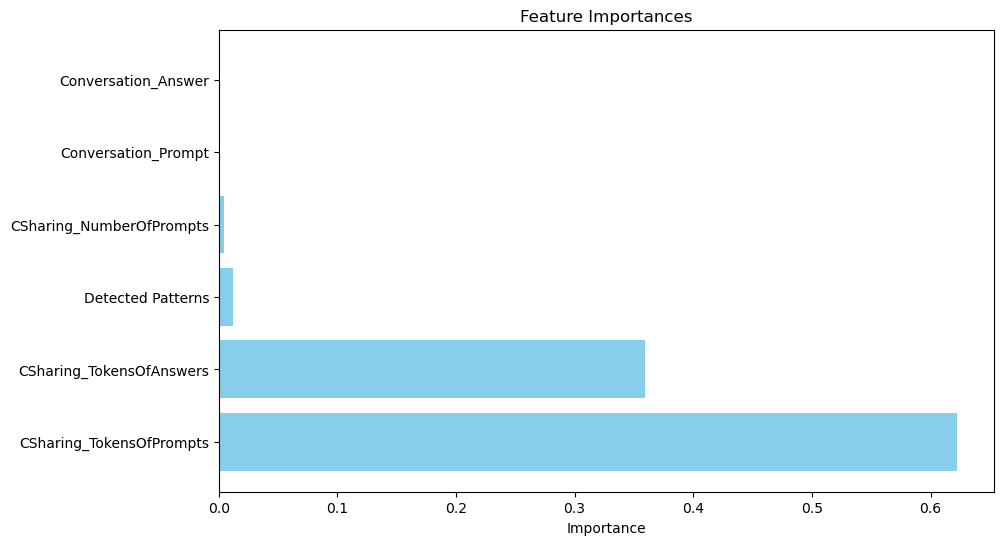

In [28]:
# Visualize feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()